## Stereo Testing

In [13]:
import numpy as np
from sklearn.preprocessing import normalize
import cv2

for i in range(70,210,2):
    print('loading images...')
    imgL = cv.imread('C:/Users/markl/startup/raw-images/RobotImages_undistorted/L_Image{}.jpg'.format(i),1)
    imgR = cv.imread('C:/Users/markl/startup/raw-images/RobotImages_undistorted/R_Image{}.jpg'.format(i),1) 

    # SGBM Parameters -----------------
    window_size = 3                     # wsize default 3; 5; 7 for SGBM reduced size image; 
                                        # 15 for SGBM full size image (1300px and above); 5 Works nicely

    left_matcher = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=160,             # max_disp has to be dividable by 16 f. E. HH 192, 256
        blockSize=5,
        P1=8 * 3 * window_size ** 2,    
        P2=32 * 3 * window_size ** 2,
        disp12MaxDiff=1,
        uniquenessRatio=15,
        speckleWindowSize=0,
        speckleRange=2,
        preFilterCap=63,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )

    right_matcher = cv2.ximgproc.createRightMatcher(left_matcher)

    # FILTER Parameters
    lmbda = 80000
    sigma = 1.2
    visual_multiplier = 1.0

    wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
    wls_filter.setLambda(lmbda)
    wls_filter.setSigmaColor(sigma)

    print('computing disparity...')
    displ = left_matcher.compute(imgL, imgR)  # .astype(np.float32)/16
    dispr = right_matcher.compute(imgR, imgL)  # .astype(np.float32)/16
    displ = np.int16(displ)
    dispr = np.int16(dispr)
    filteredImg = wls_filter.filter(displ, imgL, None, dispr)  # important to put "imgL" here!!!

    filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
    filteredImg = np.uint8(filteredImg)
    cv2.imshow('Disparity Map', filteredImg)
    cv2.imsave()
    cv2.waitKey()
    cv2.destroyAllWindows()

loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images...
computing disparity...
loading images..

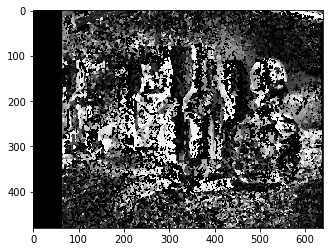

In [48]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# downscale images for faster processing
imgL = cv.imread('C:/Users/markl/startup/raw-images/RobotImages_undistorted/L_Image120.jpg')
imgR = cv.imread('C:/Users/markl/startup/raw-images/RobotImages_undistorted/R_Image120.jpg')


stereo = cv2.StereoSGBM_create(numDisparities=16*4, blockSize=5)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()